In [1]:
pip install xgboost-1.4.0_SNAPSHOT+cb207a355d1ff530b5f9a7dcb8677dc19999e270-py3-none-win_amd64.whl

Processing c:\users\sneha\desktop\projects\xgboost-1.4.0_snapshot+cb207a355d1ff530b5f9a7dcb8677dc19999e270-py3-none-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: 'C:\\Users\\Sneha\\Desktop\\PROJECTS\\xgboost-1.4.0_SNAPSHOT+cb207a355d1ff530b5f9a7dcb8677dc19999e270-py3-none-win_amd64.whl'



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


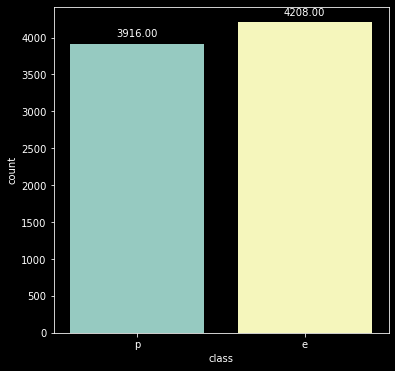

In [3]:
# CLassification of poisonous and Edible Mushrooms in the whole dataset

plt.style.use('dark_background')
plt.figure(figsize=(6, 6))
ax=sns.countplot(x = 'class', data = data)

# For adding annotations option (attributes) to barplot and countplot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

### In the given dataset we have 3916 Poisonous mushrooms and 4208 Edible mushrooms

In [4]:
features = data.columns
print(features)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


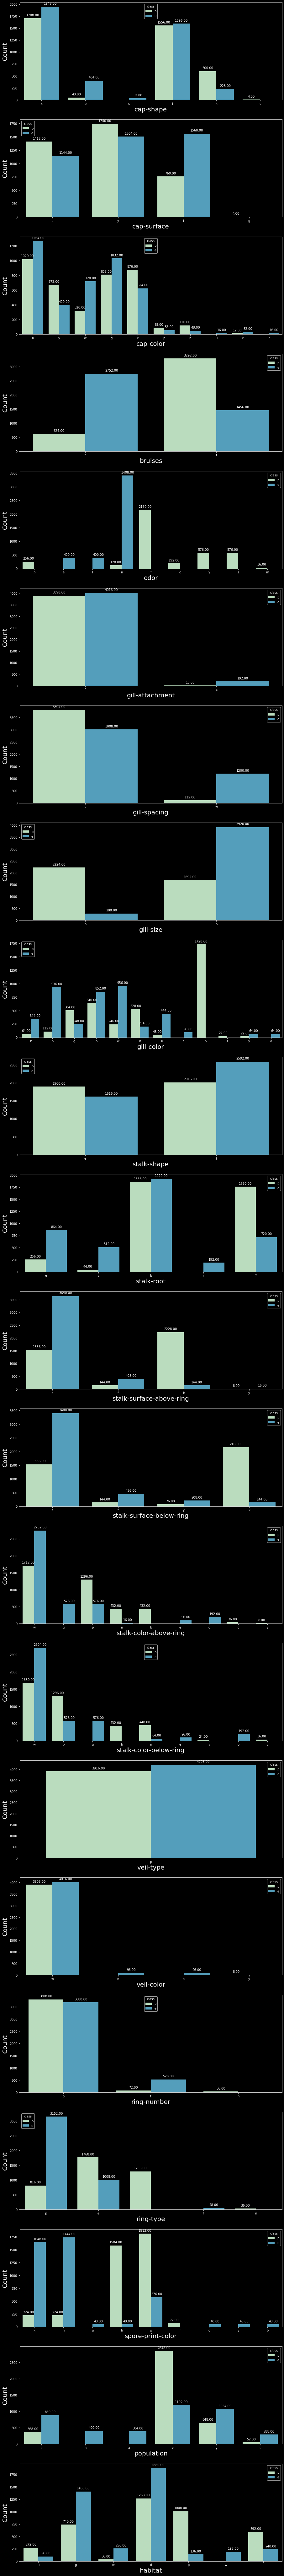

In [5]:
# how many mushrooms belong to each category in each feature for each class (edible/ poisonous)

figure, axes = plt.subplots(22,1, figsize=(15,150)) 
k = 1
for i in range(0,22):
    s = sns.countplot(x = features[k], data = data, hue="class", ax=axes[i], palette = 'GnBu')
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("Count", fontsize=20)
    k = k+1
    
# For adding annotations option (attributes) to barplot and countplot
    for p in s.patches:
        s.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

In [6]:
# Creating independent and dependent variables
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

display(data.isna().sum())
display(data.info())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

None

In [7]:
# Label encoding y - dependent variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
# One hot encoding independent variable x

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(x).toarray()
x

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
# Applying PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
x_train = kpca.fit_transform(x_train)
x_test = kpca.transform(x_test)

In [12]:
# Training the Logistic Regression Model on the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the test set
y_pred = classifier.predict(x_test)

In [13]:
#Preparing the confusion matrix
acscore = []
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
ac= accuracy_score(y_test, y_pred)
acscore.append(ac)
print(ac)

[[712 140]
 [153 620]]
0.8196923076923077


In [14]:
# NaiveBayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the test set
y_pred = classifier.predict(x_test)

In [15]:
#Preparing the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
ac= accuracy_score(y_test, y_pred)
acscore.append(ac)
print(ac)

[[828  24]
 [165 608]]
0.8836923076923077


In [16]:
# Training the RBF Kernel SVC on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=0)
classifier.fit(x_train, y_train)

# predicting test set
y_pred = classifier.predict(x_test)

In [17]:
#Preparing the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
ac= accuracy_score(y_test, y_pred)
acscore.append(ac)
print(ac)

[[852   0]
 [168 605]]
0.8966153846153846


In [18]:
# Training the K Nearest Neighbor Classification on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)

# Predicting the test set
y_pred = classifier.predict(x_test)

In [19]:
#Preparing the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
ac= accuracy_score(y_test, y_pred)
acscore.append(ac)
print(ac)

[[815  37]
 [ 58 715]]
0.9415384615384615


In [20]:
# Training the Decision Tree Classification on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(x_train, y_train)

# Predicting the test set 
y_pred = classifier.predict(x_test)

In [21]:
#Preparing the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
ac= accuracy_score(y_test, y_pred)
acscore.append(ac)
print(ac)

[[823  29]
 [ 51 722]]
0.9507692307692308


In [22]:
# Training the Random Forest Classification on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy', random_state = 0, n_estimators = 100)
classifier.fit(x_train, y_train)

# Predicting the test set
y_pred = classifier.predict(x_test)

In [23]:
#Preparing the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
ac= accuracy_score(y_test, y_pred)
acscore.append(ac)
print(ac)

[[828  24]
 [ 54 719]]
0.952


In [24]:
models = ['LogisticRegression','NaiveBayes','KernelSVM','KNearestNeighbors','DecisionTree','RandomForest']

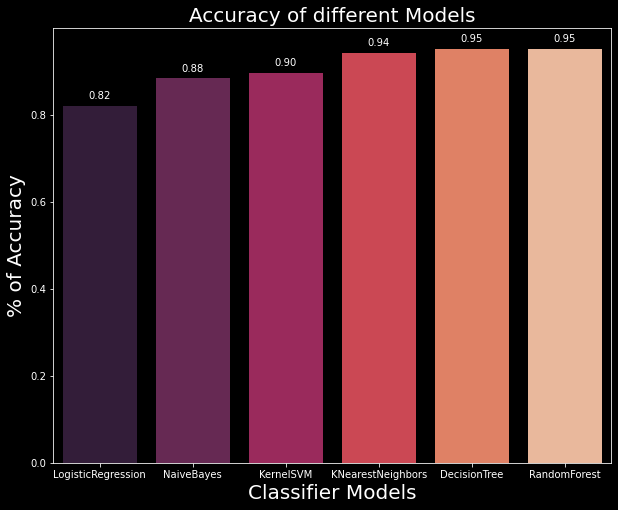

In [28]:
# Visualization of classification of models

plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
ax=sns.barplot(x = models,y=acscore,palette = "rocket")
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Models", fontsize = 20)

# For adding annotations option (attributes) to barplot and countplot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()